In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns

In [7]:
df = pd.read_csv("data/alzheimers_prediction_dataset.csv")

In [8]:
df.head()

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No


In [9]:
size = df.shape[0]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country                               74283 non-null  object 
 1   Age                                   74283 non-null  int64  
 2   Gender                                74283 non-null  object 
 3   Education Level                       74283 non-null  int64  
 4   BMI                                   74283 non-null  float64
 5   Physical Activity Level               74283 non-null  object 
 6   Smoking Status                        74283 non-null  object 
 7   Alcohol Consumption                   74283 non-null  object 
 8   Diabetes                              74283 non-null  object 
 9   Hypertension                          74283 non-null  object 
 10  Cholesterol Level                     74283 non-null  object 
 11  Family History 

No columns have any null values

Check distribution of target label

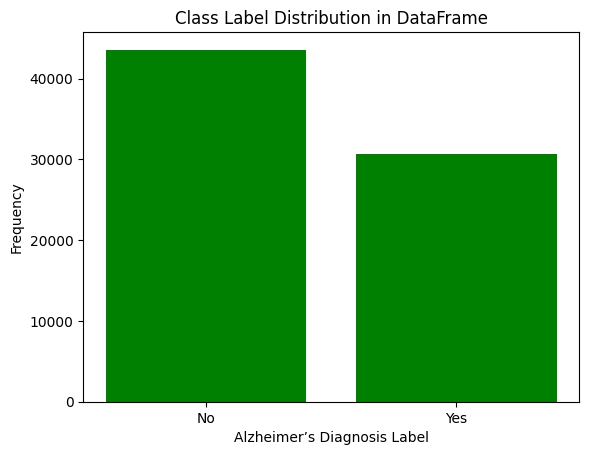

In [11]:
value_counts = df["Alzheimer’s Diagnosis"].value_counts()
label, count = list(value_counts.index), value_counts.values
plt.bar(label, count, color="green")
plt.xlabel('Alzheimer’s Diagnosis Label')
plt.ylabel('Frequency')
plt.title('Class Label Distribution in DataFrame')
plt.xticks(label)  # Set x-ticks to be the class labels
plt.show()

Will need to balance this out once data is all numerical

In [12]:
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,74283.000000,74283.000000,74283.000000,74283.000000
mean,71.964703,9.487514,26.780639,64.654241
std,12.980748,5.757020,4.764679,20.153247
min,50.000000,0.000000,18.500000,30.000000
25%,61.000000,4.000000,22.700000,47.000000
50%,72.000000,9.000000,26.800000,65.000000
75%,83.000000,14.000000,30.900000,82.000000
max,94.000000,19.000000,35.000000,99.000000


Some range in values, will use standard scalar to fix this because there is no reason to not use another (not a big range, not highly skewed)

In [13]:
scaler = StandardScaler()
numerical_cols = ["Age", "Education Level", "BMI", "Cognitive Test Score"]
df_numerical = df[numerical_cols]
scaled = scaler.fit_transform(df_numerical)
df[numerical_cols] = scaled
df.describe()

,Age,Education Level,BMI,Cognitive Test Score
count,7.428300e+04,7.428300e+04,7.428300e+04,7.428300e+04
mean,2.133073e-17,5.452248e-17,-2.495360e-16,-2.587427e-16
std,1.000007e+00,1.000007e+00,1.000007e+00,1.000007e+00
min,-1.692110e+00,-1.648002e+00,-1.737933e+00,-1.719548e+00
25%,-8.446953e-01,-9.531929e-01,-8.564409e-01,-8.760057e-01
50%,2.719233e-03,-8.468222e-02,4.063489e-03,1.715660e-02
75%,8.501337e-01,7.838285e-01,8.645679e-01,8.606988e-01
max,1.697548e+00,1.652339e+00,1.725072e+00,1.704241e+00


In [14]:
df.describe(include="object")

,Country,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,...,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283
unique,20,2,3,3,3,2,2,2,2,3,...,3,3,3,3,2,3,3,3,2,2
top,Brazil,Female,High,Current,Never,No,No,Normal,No,Medium,...,Average,High,Unemployed,Single,No,Medium,Low,Medium,Rural,No
freq,3839,37249,24853,24915,24865,59527,52134,51973,52004,24843,...,24917,24906,24801,25169,59561,24859,24873,24886,37203,43570


Country will get dropped because there are too many values to encode. This would lead to curse of dimensionality or the model creating an ordinal relationship between countries when one does not exist. Also, should not contribute to target variable. 

In [15]:
df = df.drop(columns=["Country"])

In [16]:
df.describe(include="object")

,Gender,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,Family History of Alzheimer’s,Depression Level,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
count,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283,74283
unique,2,3,3,3,2,2,2,2,3,3,3,3,3,3,2,3,3,3,2,2
top,Female,High,Current,Never,No,No,Normal,No,Medium,Good,Average,High,Unemployed,Single,No,Medium,Low,Medium,Rural,No
freq,37249,24853,24915,24865,59527,52134,51973,52004,24843,25145,24917,24906,24801,25169,59561,24859,24873,24886,37203,43570


All columns with only 2 or 3 values. This means one-hot encoding should work for most. However, for columns like physical activity, cholesterol, Depression, Air pollution, the labels are along the lines of low, medium, and high. This means label encoding is suitable for these columns as there is an ordinal relationship between the values. 

In [17]:
print("Unique values for:\nAlcohol Consumption: ", df["Alcohol Consumption"].unique()) # one-hot
print("Smoking Status: ", df["Smoking Status"].unique()) # one-hot
print("Depression Level: ", df["Depression Level"].unique()) # try label
print("Dietary Habits: ", df["Dietary Habits"].unique()) # one-hot
print("Employment Status: ", df["Employment Status"].unique()) # one-hot
print("Marital Status: ", df["Marital Status"].unique()) # one-hot
print("Social Engagement Level: ", df["Social Engagement Level"].unique()) # try label

Unique values for:
Alcohol Consumption:  ['Occasionally' 'Never' 'Regularly']
Smoking Status:  ['Never' 'Former' 'Current']
Depression Level:  ['Low' 'High' 'Medium']
Dietary Habits:  ['Healthy' 'Average' 'Unhealthy']
Employment Status:  ['Retired' 'Unemployed' 'Employed']
Marital Status:  ['Single' 'Widowed' 'Married']
Social Engagement Level:  ['Low' 'High' 'Medium']


In [18]:
object_cols = df.select_dtypes("object").columns.tolist()
label_enc_cols = ["Physical Activity Level", "Depression Level", "Sleep Quality",  "Air Pollution Exposure",
                 "Social Engagement Level", "Income Level", "Stress Levels"] 
one_hot_cols = list(set(object_cols) - set(label_enc_cols))
# try doing label encoding to see if it is better than one-hot for all

In [19]:
df_ohe = pd.get_dummies(df, columns=object_cols, drop_first=True)
df_ohe.head() # one hot binary values

,Age,Education Level,BMI,Cognitive Test Score,Gender_Male,Physical Activity Level_Low,Physical Activity Level_Medium,Smoking Status_Former,Smoking Status_Never,Alcohol Consumption_Occasionally,...,Marital Status_Widowed,Genetic Risk Factor (APOE-ε4 allele)_Yes,Social Engagement Level_Low,Social Engagement Level_Medium,Income Level_Low,Income Level_Medium,Stress Levels_Low,Stress Levels_Medium,Urban vs Rural Living_Urban,Alzheimer’s Diagnosis_Yes
0,1.389398,-1.474299,1.305314,1.257660,True,False,True,False,True,True,...,False,False,True,False,False,True,False,False,True,False
1,0.002719,-0.432087,0.654689,0.017157,True,False,True,True,False,False,...,True,False,False,False,True,False,False,False,True,False
2,1.081247,1.652339,-0.814465,-1.074486,False,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
3,-1.460997,1.304935,0.927532,0.811079,True,True,False,False,True,False,...,False,False,False,False,False,True,True,False,False,False
4,-1.075808,-1.126895,0.675677,-0.776765,False,False,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False


In [20]:
df_ohe.info() # information of new data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 36 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       74283 non-null  float64
 1   Education Level                           74283 non-null  float64
 2   BMI                                       74283 non-null  float64
 3   Cognitive Test Score                      74283 non-null  float64
 4   Gender_Male                               74283 non-null  bool   
 5   Physical Activity Level_Low               74283 non-null  bool   
 6   Physical Activity Level_Medium            74283 non-null  bool   
 7   Smoking Status_Former                     74283 non-null  bool   
 8   Smoking Status_Never                      74283 non-null  bool   
 9   Alcohol Consumption_Occasionally          74283 non-null  bool   
 10  Alcohol Consumption_Regularly     

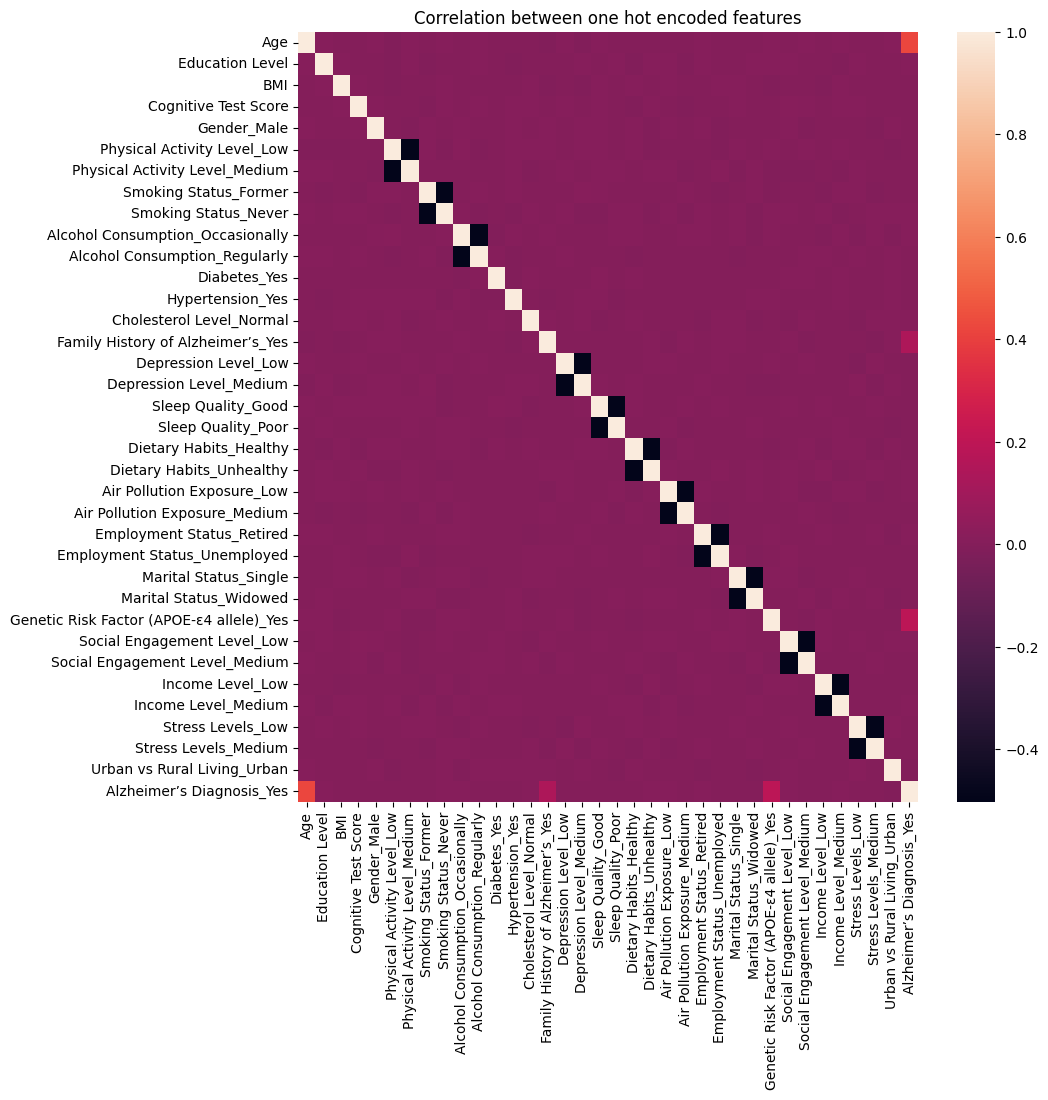

In [21]:
ohe_corr = df_ohe.corr() # heat map of correlation
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ohe_corr, ax=ax)
plt.title("Correlation between one hot encoded features")
plt.show()

In [22]:
df_label = df.copy() # new df for label encoding

In [23]:
le = LabelEncoder()
for col in label_enc_cols:
    df_label[col] = le.fit_transform(df[col])
df_label.head()

,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,Cholesterol Level,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,1.389398,Male,-1.474299,1.305314,2,Never,Occasionally,No,No,Normal,...,Healthy,0,Retired,Single,No,1,2,0,Urban,No
1,0.002719,Male,-0.432087,0.654689,2,Former,Never,No,No,Normal,...,Healthy,2,Unemployed,Widowed,No,0,1,0,Urban,No
2,1.081247,Female,1.652339,-0.814465,0,Current,Occasionally,No,Yes,Normal,...,Average,2,Employed,Single,No,1,2,0,Rural,No
3,-1.460997,Male,1.304935,0.927532,1,Never,Regularly,Yes,No,Normal,...,Healthy,2,Retired,Single,No,0,2,1,Rural,No
4,-1.075808,Female,-1.126895,0.675677,0,Former,Never,Yes,No,Normal,...,Unhealthy,0,Employed,Married,No,1,2,0,Rural,No


One hot rest

In [24]:
df_label= pd.get_dummies(df_label, columns=one_hot_cols, drop_first=True)
df_label.head()

,Age,Education Level,BMI,Physical Activity Level,Cognitive Test Score,Depression Level,Sleep Quality,Air Pollution Exposure,Social Engagement Level,Income Level,...,Alcohol Consumption_Regularly,Employment Status_Retired,Employment Status_Unemployed,Cholesterol Level_Normal,Hypertension_Yes,Family History of Alzheimer’s_Yes,Diabetes_Yes,Smoking Status_Former,Smoking Status_Never,Genetic Risk Factor (APOE-ε4 allele)_Yes
0,1.389398,-1.474299,1.305314,2,1.257660,1,2,0,1,2,...,False,True,False,True,False,False,False,False,True,False
1,0.002719,-0.432087,0.654689,2,0.017157,1,1,2,0,1,...,False,False,True,True,False,False,False,True,False,False
2,1.081247,1.652339,-0.814465,0,-1.074486,0,1,2,1,2,...,False,False,False,True,True,False,False,False,False,False
3,-1.460997,1.304935,0.927532,1,0.811079,2,0,2,0,2,...,True,True,False,True,False,False,True,False,True,False
4,-1.075808,-1.126895,0.675677,0,-0.776765,0,2,0,1,2,...,False,False,False,True,False,False,True,True,False,False


In [25]:
df_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74283 entries, 0 to 74282
Data columns (total 29 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Age                                       74283 non-null  float64
 1   Education Level                           74283 non-null  float64
 2   BMI                                       74283 non-null  float64
 3   Physical Activity Level                   74283 non-null  int32  
 4   Cognitive Test Score                      74283 non-null  float64
 5   Depression Level                          74283 non-null  int32  
 6   Sleep Quality                             74283 non-null  int32  
 7   Air Pollution Exposure                    74283 non-null  int32  
 8   Social Engagement Level                   74283 non-null  int32  
 9   Income Level                              74283 non-null  int32  
 10  Stress Levels                     

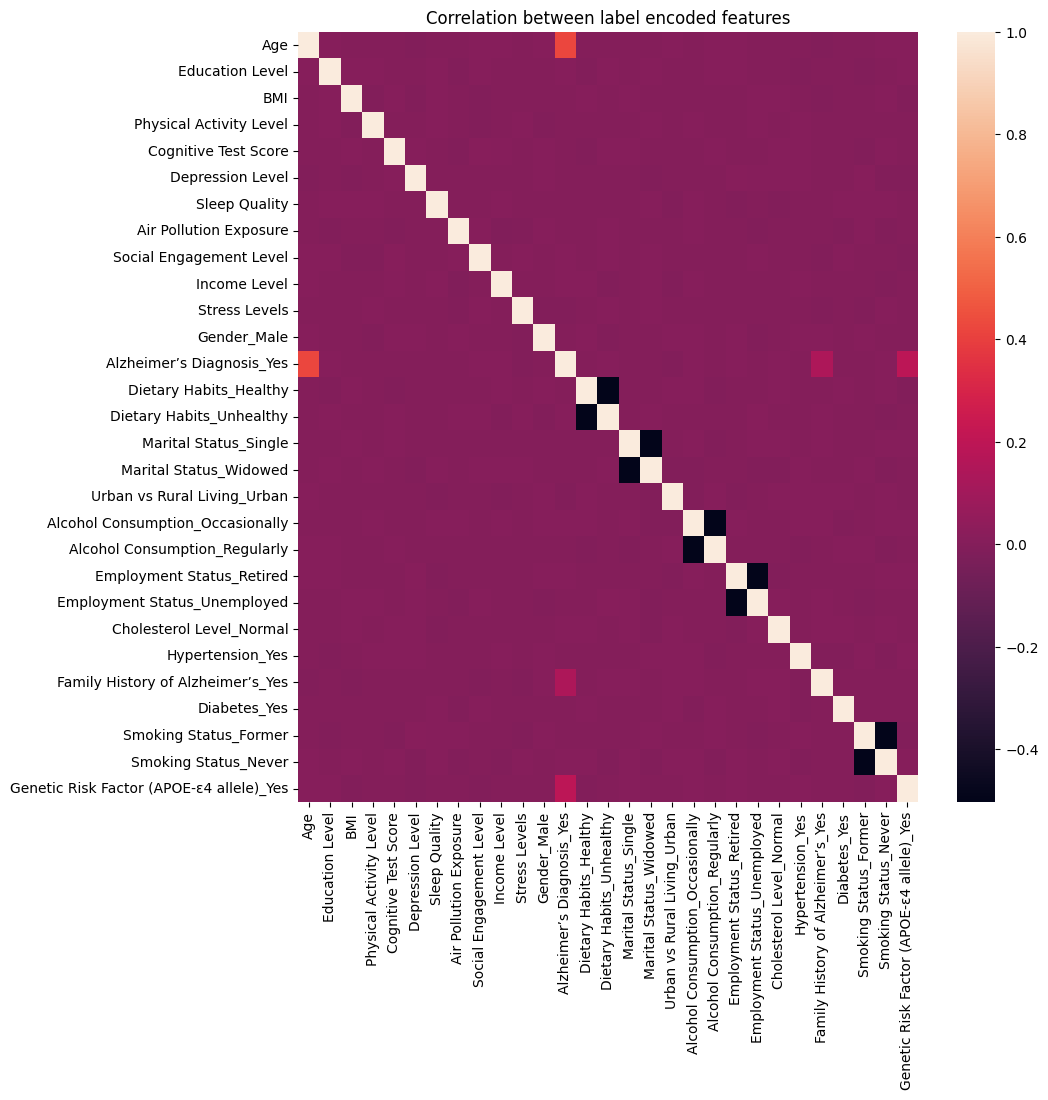

In [26]:
label_corr = df_label.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(label_corr, ax=ax)
plt.title("Correlation between label encoded features")
plt.show()

There is some correlation between features, but it is usually between features like Physical Activity_Low and Physical Activity_Medium. I do not think it is worth removing these features as it could negatively impact the result. The correlation between these features is greater than -0.4 (close to 0). There are no other features correlated closely. However, there is some correlation between Age and the target variable. This should be monitored when evaluating the model.

Need to balance the datasets using oversampling

In [28]:
# run this cell if you are using scikit-learn version 1.3.X
#!pip uninstall scikit-learn --yes
#!pip install scikit-learn==1.2.2
# restart kernal after

In [27]:
from imblearn.over_sampling import RandomOverSampler

In [30]:
X_ohe = df_ohe.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y_ohe = df_ohe["Alzheimer’s Diagnosis_Yes"]

In [31]:
X_label = df_label.drop("Alzheimer’s Diagnosis_Yes", axis=1)
y_label = df_label["Alzheimer’s Diagnosis_Yes"]

In [32]:
ros = RandomOverSampler(random_state=42)
X_ohe_sample, y_ohe_sample = ros.fit_resample(X_ohe, y_ohe)
X_label_sample, y_label_sample = ros.fit_resample(X_label, y_label)

In [37]:
print(y_ohe_sample.value_counts())
print(y_label_sample.value_counts())

Alzheimer’s Diagnosis_Yes
False    43570
True     43570
Name: count, dtype: int64
Alzheimer’s Diagnosis_Yes
False    43570
True     43570
Name: count, dtype: int64


Even data sets, we can go into modelling now